In [90]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [91]:
fraud=pd.read_csv(r"C:\Users\AJAY\Downloads\Fraud_check.csv")

In [92]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [93]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [94]:
fraud.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

<AxesSubplot:>

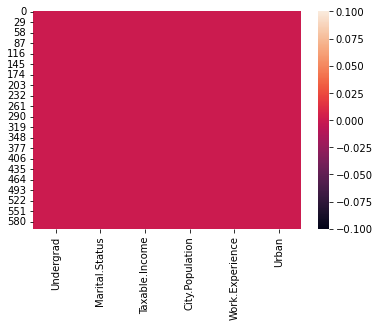

In [95]:
sns.heatmap(fraud.isna())

In [96]:
fraud.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
595    False
596    False
597    False
598    False
599    False
Length: 600, dtype: bool

In [97]:
fraud.corr()
fraud.corr().to_csv("Dtree.csv")

<AxesSubplot:>

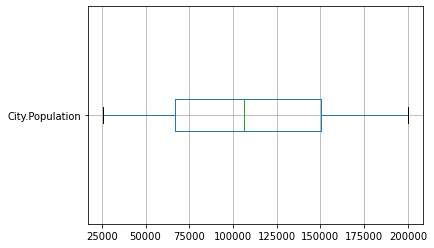

In [98]:
fraud.boxplot('City.Population',vert=False)

<AxesSubplot:>

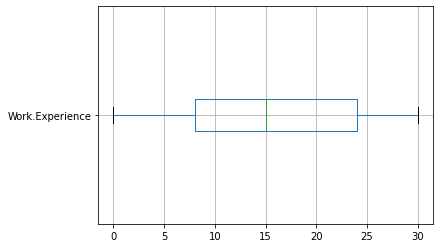

In [99]:
fraud.boxplot('Work.Experience',vert=False)

In [100]:
fraud["Taxable.Income"]=pd.cut(fraud["Taxable.Income"], bins=[0,30000,99620], labels=["Risky","Good"])
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,Good,39492,7,YES
596,YES,Divorced,Good,55369,2,YES
597,NO,Divorced,Good,154058,0,YES
598,YES,Married,Good,180083,17,NO


In [101]:
Y=fraud["Taxable.Income"]
X1=fraud.iloc[:,:2]

In [102]:
X1.dtypes

Undergrad         object
Marital.Status    object
dtype: object

In [103]:
X2=fraud.iloc[:,3:]
X2.dtypes

City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [104]:
X=pd.concat([X1,X2],axis=1)

In [105]:
X.dtypes

Undergrad          object
Marital.Status     object
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [106]:
le=LabelEncoder()
Mm=MinMaxScaler()
X["Undergrad"]=le.fit_transform(X["Undergrad"])
X["Undergrad"]=pd.DataFrame(X["Undergrad"])
X["Marital.Status"]=le.fit_transform(X["Marital.Status"])
X["Marital.Status"]=pd.DataFrame(X["Marital.Status"])
X["Urban"]=le.fit_transform(X["Urban"])
X["Urban"]=pd.DataFrame(X["Urban"])

X["City.Population"]=Mm.fit_transform(X[["City.Population"]])
X["Work.Experience"]=Mm.fit_transform(X[["Work.Experience"]])
Y=le.fit_transform(fraud["Taxable.Income"])
Y=pd.DataFrame(Y)

In [107]:
X

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,0.139472,0.333333,1
1,1,0,0.622394,0.600000,1
2,0,1,0.772568,1.000000,1
3,1,2,0.962563,0.500000,1
4,0,1,0.010081,0.933333,0
...,...,...,...,...,...
595,1,0,0.078811,0.233333,1
596,1,0,0.170058,0.066667,1
597,0,0,0.737240,0.000000,1
598,1,1,0.886810,0.566667,0


In [108]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=1)

In [109]:
dt=DecisionTreeClassifier(criterion='entropy')

In [110]:
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)

print(classification_report(ytest,ypred))


              precision    recall  f1-score   support

           0       0.79      0.75      0.77       144
           1       0.18      0.22      0.20        36

    accuracy                           0.64       180
   macro avg       0.49      0.49      0.49       180
weighted avg       0.67      0.64      0.66       180



In [111]:
print('Training accuracy:',dt.score(xtrain,ytrain))
print('Testing Accuracy:',dt.score(xtest,ytest))

Training accuracy: 1.0
Testing Accuracy: 0.6444444444444445


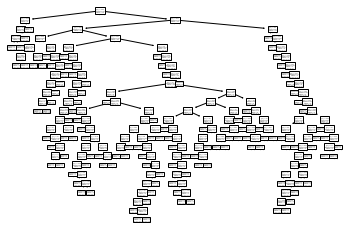

In [112]:
tree.plot_tree(dt)
plt.show()

In [113]:
plt.rcParams['figure.figsize']=(16,8)
plt.rcParams['figure.dpi']=250

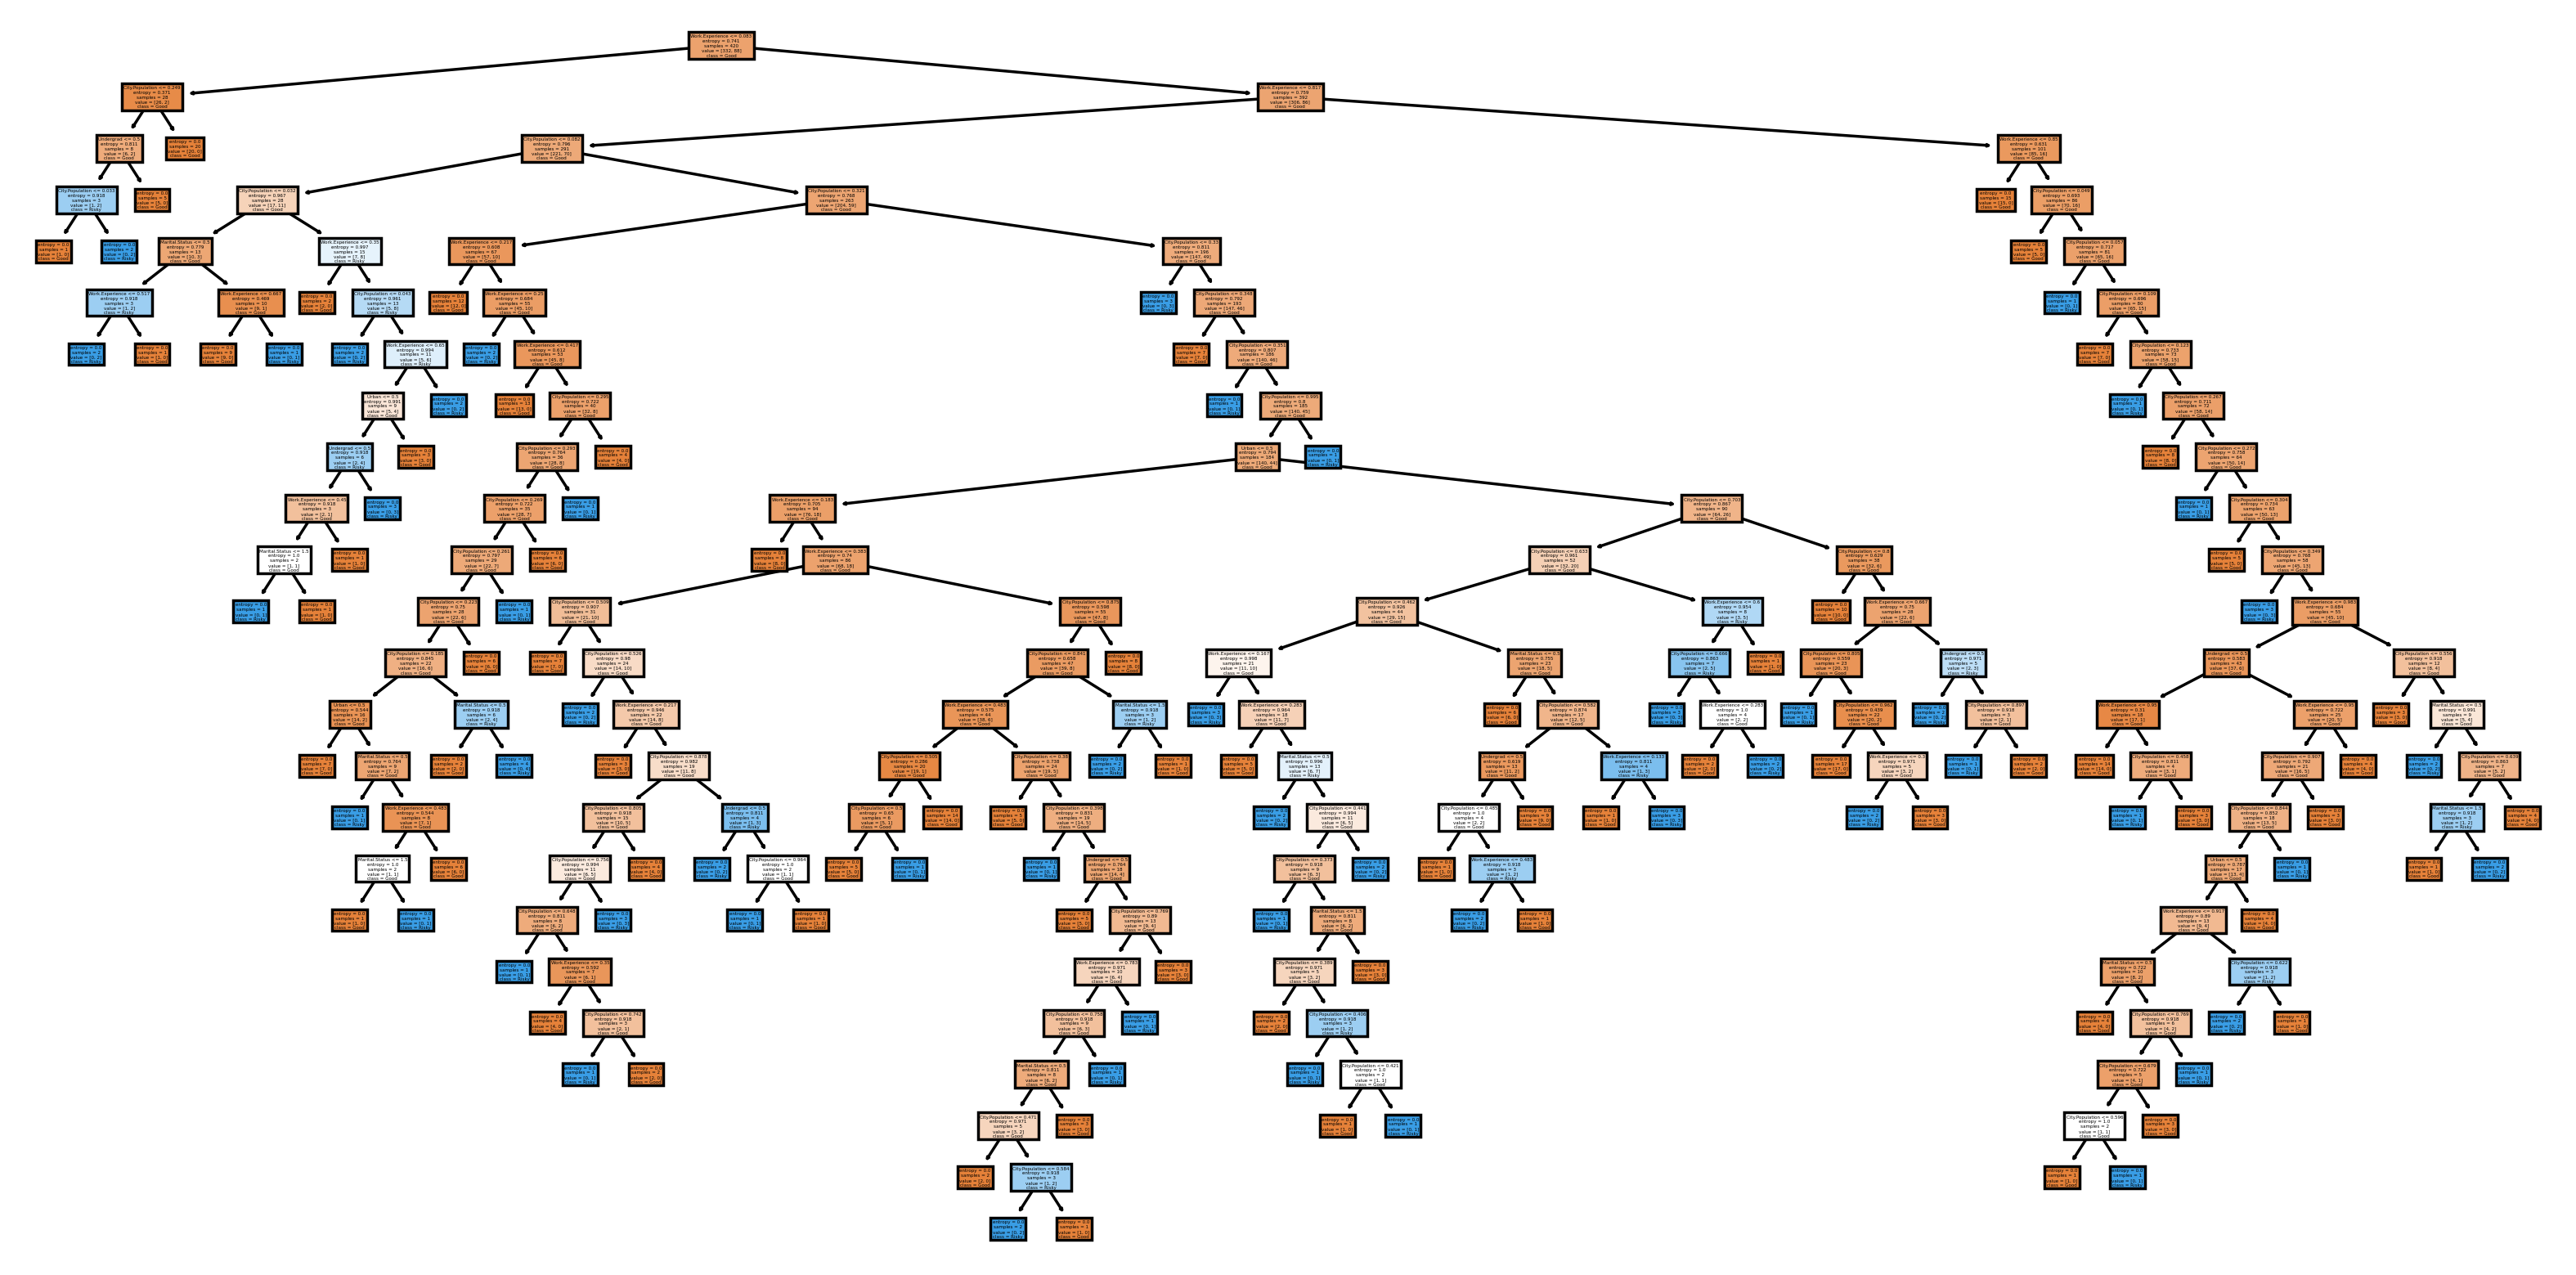

In [114]:
 tree.plot_tree(dt,feature_names=X.columns,
              class_names=fraud['Taxable.Income'].unique(),
              filled=True)
plt.show()


In [115]:
dt.feature_importances_

array([0.0563153 , 0.1048738 , 0.54396131, 0.26665679, 0.0281928 ])

In [116]:
X.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,0.139472,0.333333,1
1,1,0,0.622394,0.600000,1
2,0,1,0.772568,1.000000,1
3,1,2,0.962563,0.500000,1
4,0,1,0.010081,0.933333,0


In [117]:
fraud["Taxable.Income"]

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Taxable.Income, Length: 600, dtype: category
Categories (2, object): ['Risky' < 'Good']